In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv(r'C:\Uni_doc\IEEE\Author\Patch0-20230124\education\student_data.csv')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,AvgGrade,GradeClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,6,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8,E
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,9,E


In [3]:
data.shape

(395, 35)

school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences	G1	G2	G3


In [4]:
df_selected=data.loc[:,[ 'sex','age', 'Pstatus', 'Medu', 'Mjob','failures','schoolsup','activities','nursery','internet',
'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3','GradeClass']].copy()



In [5]:
df_selected.head()

,sex,age,Pstatus,Medu,Mjob,failures,schoolsup,activities,nursery,internet,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeClass
0,F,18,A,4,at_home,0,yes,no,yes,no,...,3,4,1,1,3,6,5,6,6,E
1,F,17,T,1,at_home,0,no,no,no,yes,...,3,3,1,1,3,4,5,5,6,F
2,F,15,T,1,at_home,3,yes,no,yes,yes,...,3,2,2,3,3,10,7,8,10,E
3,F,15,T,4,health,0,no,yes,yes,yes,...,2,2,1,1,5,2,15,14,15,B
4,F,16,T,3,other,0,no,no,yes,no,...,3,2,1,2,5,4,6,10,10,E


In [6]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, metrics, decomposition
from sklearn import linear_model 
import seaborn as sns

<AxesSubplot: xlabel='GradeClass', ylabel='count'>

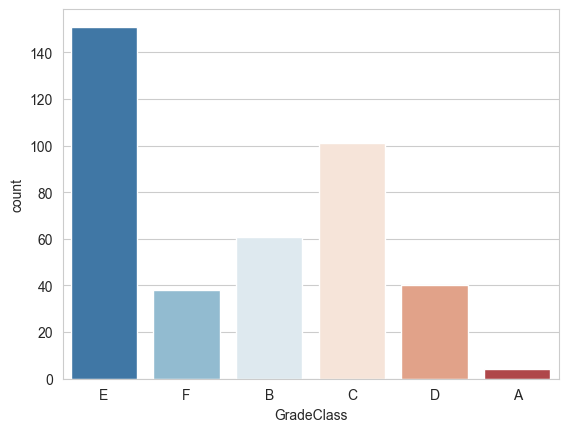

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='GradeClass',data=df_selected,palette='RdBu_r')

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_selected['sex']=le.fit_transform(df_selected['sex'])
df_selected['age']=le.fit_transform(df_selected['age'])
df_selected['Pstatus']=le.fit_transform(df_selected['Pstatus'])
df_selected['Medu']=le.fit_transform(df_selected['Medu'])
df_selected['schoolsup']=le.fit_transform(df_selected['schoolsup'])
df_selected['Mjob']=le.fit_transform(df_selected['Mjob'])
df_selected['activities']=le.fit_transform(df_selected['activities'])
df_selected['nursery']=le.fit_transform(df_selected['nursery'])
df_selected['internet']=le.fit_transform(df_selected['internet'])
df_selected['GradeClass']=le.fit_transform(df_selected['GradeClass'])

In [9]:
df_selected.head()

,sex,age,Pstatus,Medu,Mjob,failures,schoolsup,activities,nursery,internet,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeClass
0,0,3,0,4,0,0,1,0,1,0,...,3,4,1,1,3,6,5,6,6,4
1,0,2,1,1,0,0,0,0,0,1,...,3,3,1,1,3,4,5,5,6,5
2,0,0,1,1,0,3,1,0,1,1,...,3,2,2,3,3,10,7,8,10,4
3,0,0,1,4,1,0,0,1,1,1,...,2,2,1,1,5,2,15,14,15,1
4,0,1,1,3,2,0,0,0,1,0,...,3,2,1,2,5,4,6,10,10,4


<AxesSubplot: xlabel='selection', ylabel='features'>

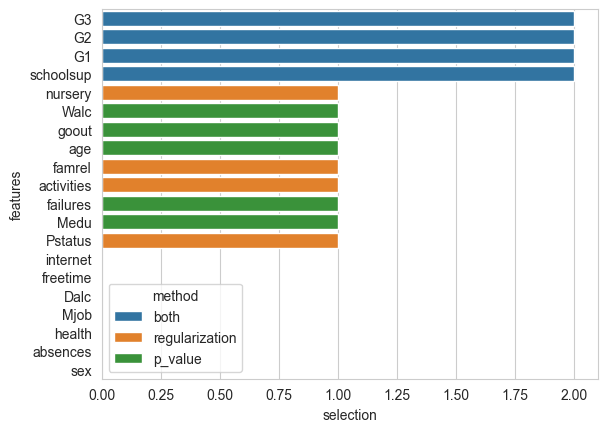

In [10]:
X = df_selected.drop("GradeClass", axis=1).values
y = df_selected["GradeClass"].values
feature_names = df_selected.drop("GradeClass", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func= feature_selection.f_regression, k=9).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]
## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=9).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(
    lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(
    lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method"
            , data=dtf_features.sort_values("selection", ascending=False), dodge=False)

'sex','age', 'Pstatus', 'Medu', 'Mjob','failures','schoolsup','activities','nursery','internet',
'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3','GradeClass'

In [11]:
norm_data_random = df_selected.sample(frac=1 )

norm_data_random.shape

(395, 21)

In [12]:
norm_data_random = df_selected.sample(frac=1 )
# Spliting data
X=norm_data_random[['G1','G2','G3','nursery', 'Walc', 'goout','schoolsup','age'
                    ,'famrel','failures', 'Medu','activities','Pstatus']]
y=norm_data_random['GradeClass']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training and 20% test

(array([11.,  0., 11., 31., 68., 66., 57., 46., 17.,  9.]),
 array([-2.82234132, -2.3174147 , -1.81248808, -1.30756147, -0.80263485,
        -0.29770823,  0.20721839,  0.712145  ,  1.21707162,  1.72199824,
         2.22692485]),
 <BarContainer object of 10 artists>)

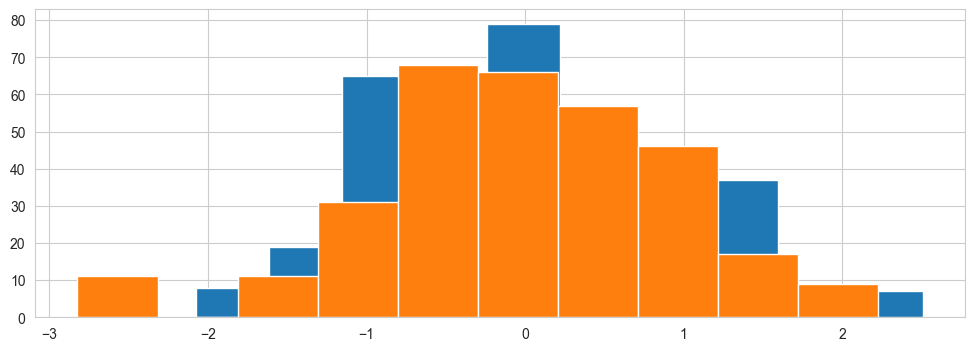

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
fig, ax = plt.subplots(figsize=(12, 4))
scaler = StandardScaler()
x_std = scaler.fit_transform(X_train)
ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn  import ensemble
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error, r2_score
def Set_score(algoname,yPredicted):
    return algoname, round(accuracy_score(y_test, yPredicted),3) , round(mean_absolute_error(y_test, yPredicted),3), round(mean_squared_error(y_test, yPredicted),3), round(np.sqrt(mean_squared_error(y_test, yPredicted)),3)

score=[]

In [16]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
# Create model object
#hidden_layer_sizes=(6,5), random_state=5, verbose=True, learning_rate_init=0.01
clf = MLPClassifier()
# Fit data onto the model
clf.fit(X_train,y_train)
# Make prediction on test dataset
ypred=clf.predict(X_test)
# Import accuracy score 
from sklearn.metrics import accuracy_score
# Calcuate accuracy
accuracy_score(y_test,ypred)
print("MLPClassifier Accuracy Score -> ",accuracy_score(y_test,ypred)*100)
score.append(Set_score("MLPClassifier",ypred))

MLPClassifier Accuracy Score ->  91.13924050632912


In [17]:
# fit the training dataset on the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy'
                                       , random_state = 0)
classifier_rf.fit(X_train,y_train)
y_pred_RF = classifier_rf.predict(X_test)
print("Random Forest Accuracy Score -> ",accuracy_score(y_test,y_pred_RF)*100)
score.append(Set_score("Random Forest",y_pred_RF))

Random Forest Accuracy Score ->  94.9367088607595


{'whiskers': [<matplotlib.lines.Line2D at 0x2b44cb320d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b44cb32610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b44cb26df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b44cb32b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b44cb32df0>],
 'means': []}

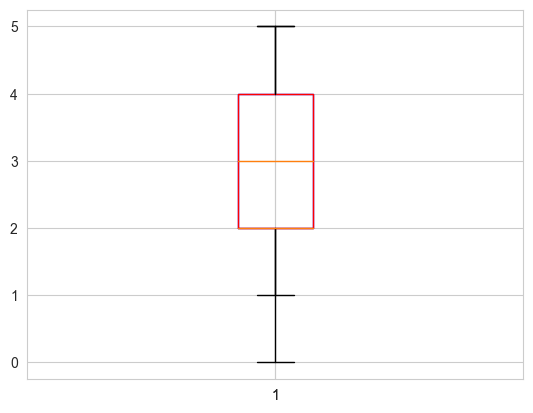

In [18]:
plt.boxplot( y_test,boxprops=dict(color='blue') )
plt.boxplot( y_pred_RF, boxprops=dict(color='red'))

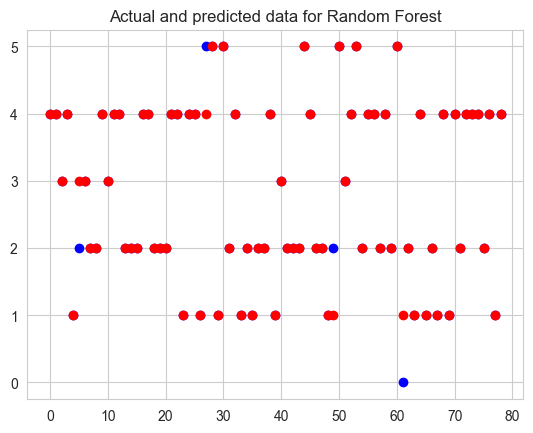

In [19]:
def plotGraph(y_test,y_pred,ClassifierName):

    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_test)), y_pred, color='red')
    plt.title(ClassifierName)
    plt.show()
    return


plotGraph(y_test, y_pred_RF, "Actual and predicted data for Random Forest")

<AxesSubplot: xlabel='GradeClass', ylabel='Density'>

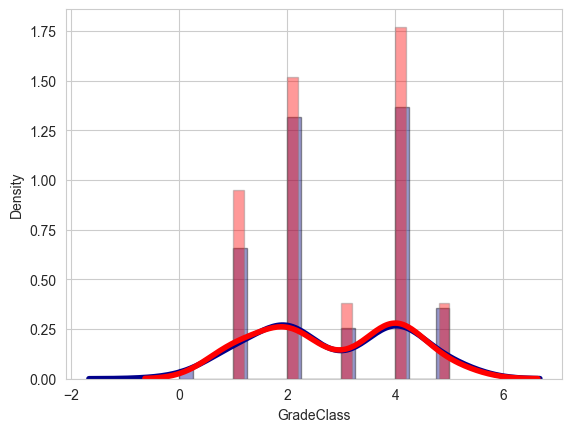

In [20]:
sns.distplot(y_test, hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(y_pred_RF, hist=True, kde=True, 
             bins=int(100/5), color = 'red', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

In [21]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVC = classifier_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_SVC)
score.append(Set_score('SVC-rbf',y_pred_SVC))
print(cm)
accuracy_score(y_test, y_pred_SVC)

[[ 0  1  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  1 24  1  0  0]
 [ 0  0  0  2  3  0]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  1  6]]


0.9113924050632911

In [22]:
from sklearn.svm import SVC
classifier_svc_l = SVC(kernel = 'linear', random_state = 0)
classifier_svc_l.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVC_1 = classifier_svc_l.predict(X_test)
cm = confusion_matrix(y_test, y_pred_SVC_1)
score.append(Set_score('SVC-Linear',y_pred_SVC_1))
print(cm)
accuracy_score(y_test, y_pred_SVC_1)

[[ 0  1  0  0  0  0]
 [ 1 12  0  0  0  0]
 [ 0  1 23  2  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  1 25  1]
 [ 0  0  0  0  1  6]]


0.8987341772151899

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_GaussianNB = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_GaussianNB)
score.append(Set_score('GaussianNB',y_pred_GaussianNB))
print(cm)
accuracy_score(y_test, y_pred_GaussianNB)

[[ 0  1  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  2 22  2  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  3 23  1]
 [ 0  0  0  0  0  7]]


0.8860759493670886

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier_tr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_tr.fit(X_train, y_train)
y_pred_dt = classifier_tr.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dt)
score.append(Set_score('DecisionTreeClassifier',y_pred_dt))
print(cm)
accuracy_score(y_test, y_pred_dt)

[[ 0  1  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  1 22  3  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  0  7]]


0.9367088607594937

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_KNN = classifier_KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_KNN)
score.append(Set_score('KNeighborsClassifier',y_pred_KNN))
print(cm)
accuracy_score(y_test, y_pred_KNN)

[[ 0  1  0  0  0  0]
 [ 0 12  1  0  0  0]
 [ 0  1 20  2  3  0]
 [ 0  0  3  1  1  0]
 [ 0  0  0  0 27  0]
 [ 0  0  0  0  6  1]]


0.7721518987341772

In [26]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_log.predict(X_test)
score.append(Set_score('LogisticRegression',y_pred))
accuracy_score(y_test, y_pred)

0.9493670886075949

In [27]:
pd.DataFrame(score, columns=['Model', 'accuracy_score', 'MAE', 'MSE', 'RMSE'])

,Model,accuracy_score,MAE,MSE,RMSE
0,MLPClassifier,0.911,0.089,0.089,0.298
1,Random Forest,0.949,0.051,0.051,0.225
2,SVC-rbf,0.911,0.089,0.089,0.298
3,SVC-Linear,0.899,0.101,0.101,0.318
4,GaussianNB,0.886,0.114,0.114,0.338
5,DecisionTreeClassifier,0.937,0.063,0.063,0.252
6,KNeighborsClassifier,0.772,0.266,0.342,0.585
7,LogisticRegression,0.949,0.051,0.051,0.225


<AxesSubplot: xlabel='Model'>

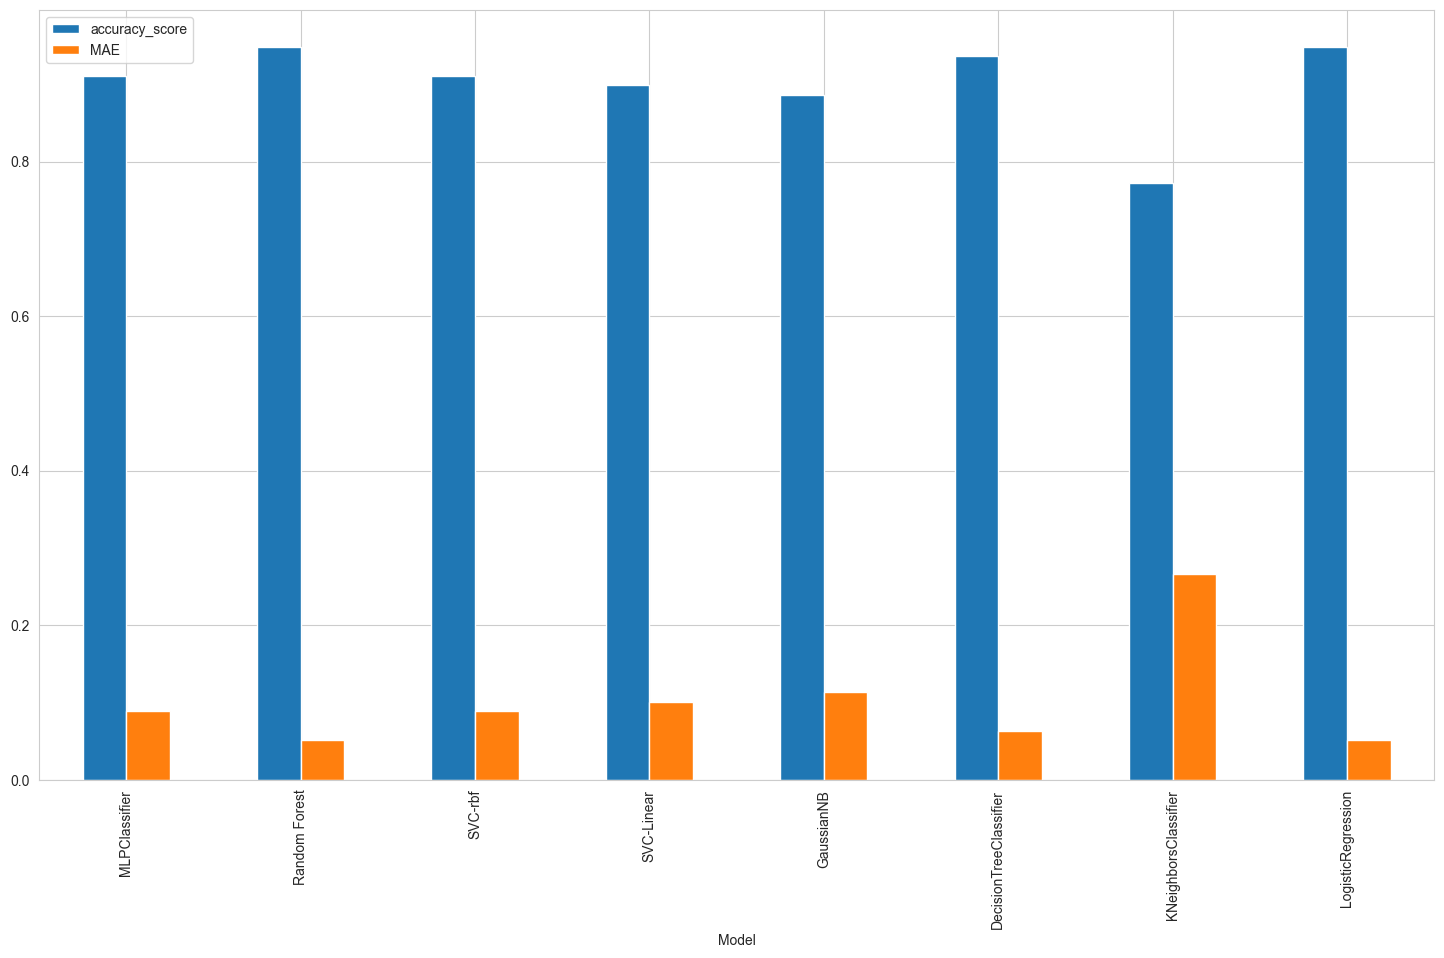

In [28]:
pd.DataFrame(score, columns=['Model','accuracy_score', 'MAE', 'MSE', 'RMSE']).plot(x="Model"
                                                                                   , y=["accuracy_score", "MAE"]
                                                                                   , kind="bar", figsize=(18,10))